<a href="https://colab.research.google.com/github/ElpoderdelComputo/Tutoriales_YouTube/blob/main/TRAIN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrenando una Maquina de Sopote Vectorial**


**YouTube: El poder del computo**

In [69]:
#Importar librerias
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [71]:
# Importamos conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Etiquetas de clase:', np.unique(y))

Etiquetas de clase: [0 1 2]


In [72]:
# Dividimos datos 70% para entrenamiento y 30% para test:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Número de muestras en y:', np.bincount(y))
print('Número de muestras en y_train:', np.bincount(y_train))
print('Número de muestras en y_test:', np.bincount(y_test))

Número de muestras en y: [50 50 50]
Número de muestras en y_train: [35 35 35]
Número de muestras en y_test: [15 15 15]


In [73]:
# Estandarizar los datos

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [75]:
# Funcion para graficar
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Configurar el generador de marcadores y el mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Mostrar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    #resaltar muestras de prueba
    if test_idx:
        # Mostrar todas las muestras
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                     c='b',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [76]:
from sklearn.metrics import accuracy_score

# Entrenamos el modelo
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

Accuracy en el conjunto de prueba: 0.98


<ipython-input-75-7b5dd3f35cd4>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


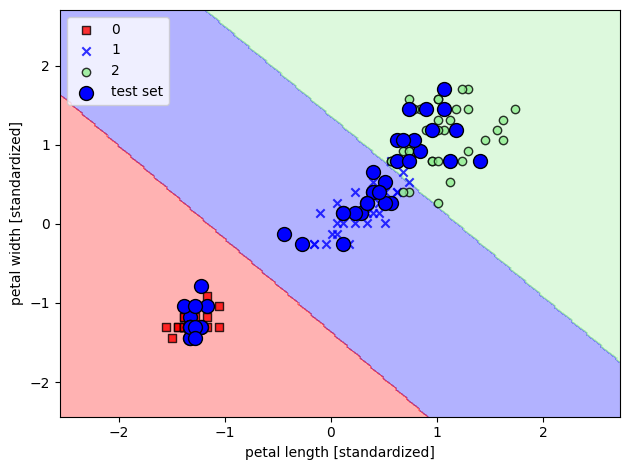

In [78]:
# Predicciones en el conjunto de prueba
y_test_pred = svm.predict(X_test_std)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy_test:.2f}')

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

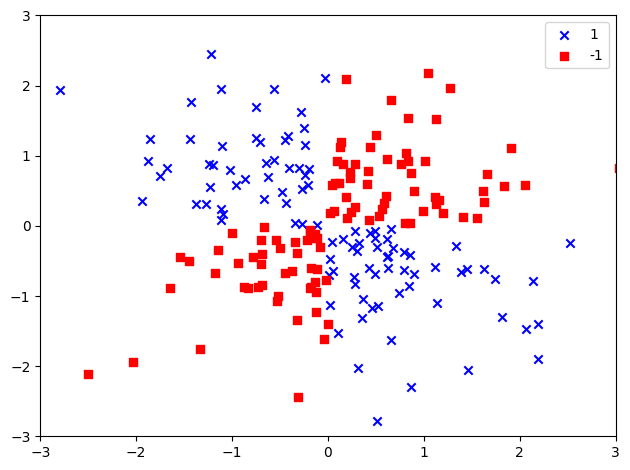

In [79]:
# Linealmente inseparables

# Generamos datos xor
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

In [97]:
# Dividimos datos 70% para entrenamiento y 30% para test:
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(
    X_xor, y_xor, test_size=0.2, random_state=1, stratify=y_xor)


In [98]:
print('Número de muestras en y_xor:', np.bincount(abs(y_xor)))
print('Número de muestras en y_xor_train:', np.bincount((abs(y_xor_train))))
print('Número de muestras en y_xor_test:', np.bincount(abs(y_xor_test)))


Número de muestras en y_xor: [  0 200]
Número de muestras en y_xor_train: [  0 160]
Número de muestras en y_xor_test: [ 0 40]


Accuracy en el conjunto de prueba: 0.85


<ipython-input-75-7b5dd3f35cd4>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


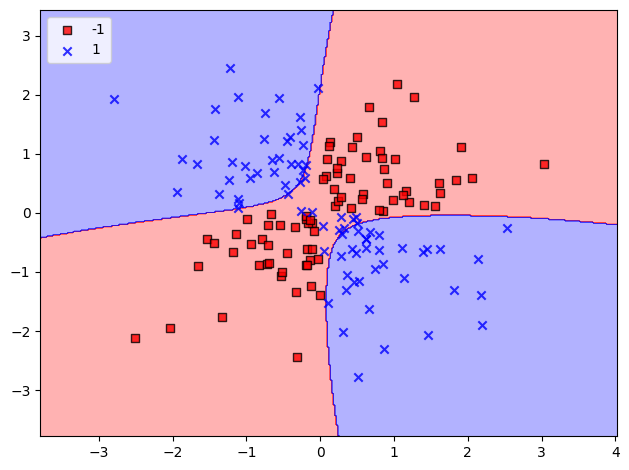

In [100]:
# ## Usando el truco del kernel para encontrar hiperplanos de separación en un espacio de dimensiones superiores

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

# Predicciones en el conjunto de prueba
y_test_pred = svm.predict(X_xor_test)
accuracy_test = accuracy_score(y_xor_test, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy_test:.2f}')


plot_decision_regions(X_xor_train, y_xor_train,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()

<ipython-input-75-7b5dd3f35cd4>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


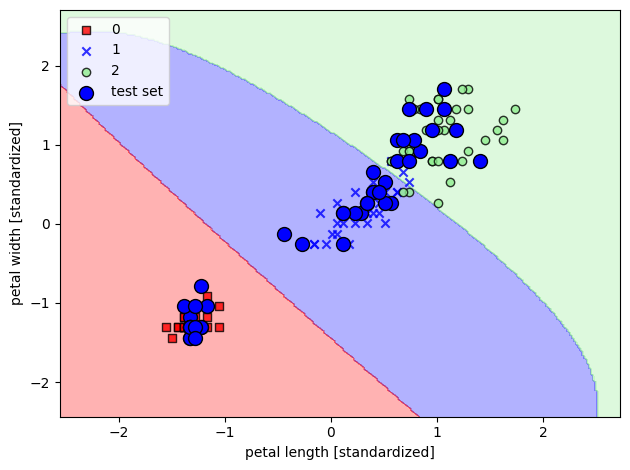

In [101]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

In [102]:
# Predicciones en el conjunto de prueba
y_test_pred = svm.predict(X_test_std)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy_test:.2f}')

Accuracy en el conjunto de prueba: 0.98


<ipython-input-75-7b5dd3f35cd4>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


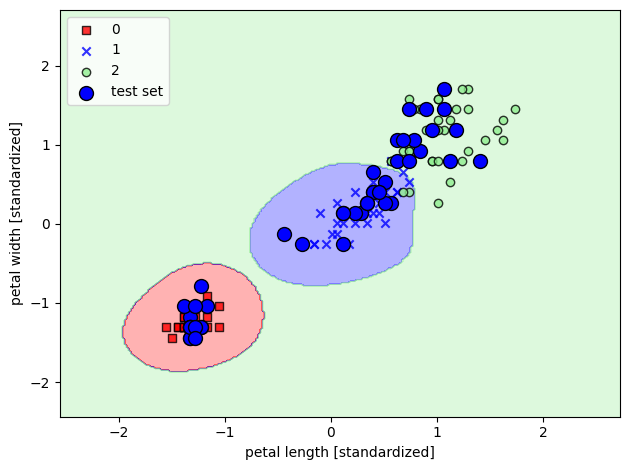

In [111]:
svm = SVC(kernel='rbf', random_state=1, gamma=5.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()

In [112]:
# Predicciones en el conjunto de prueba
y_test_pred = svm.predict(X_test_std)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy_test:.2f}')

Accuracy en el conjunto de prueba: 0.98
